In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # To split the actual data into training and testing sets
from sklearn.preprocessing import StandardScaler # Scaling the training and testing sets as a part of data pre-processing
from sklearn.metrics import confusion_matrix,classification_report # This is to show the accuracy and the precision score of the models that has been built
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score # accuracy metric for the models
import matplotlib.pyplot as plt # To plot the visualizations
from pandas.plotting import scatter_matrix
import seaborn as sns

In [31]:
dataset = pd.read_csv("/Users/rakeshchoudhary/Downloads/heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
print( 'Shape of DataFrame: {}'.format(dataset.shape))
print (dataset.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


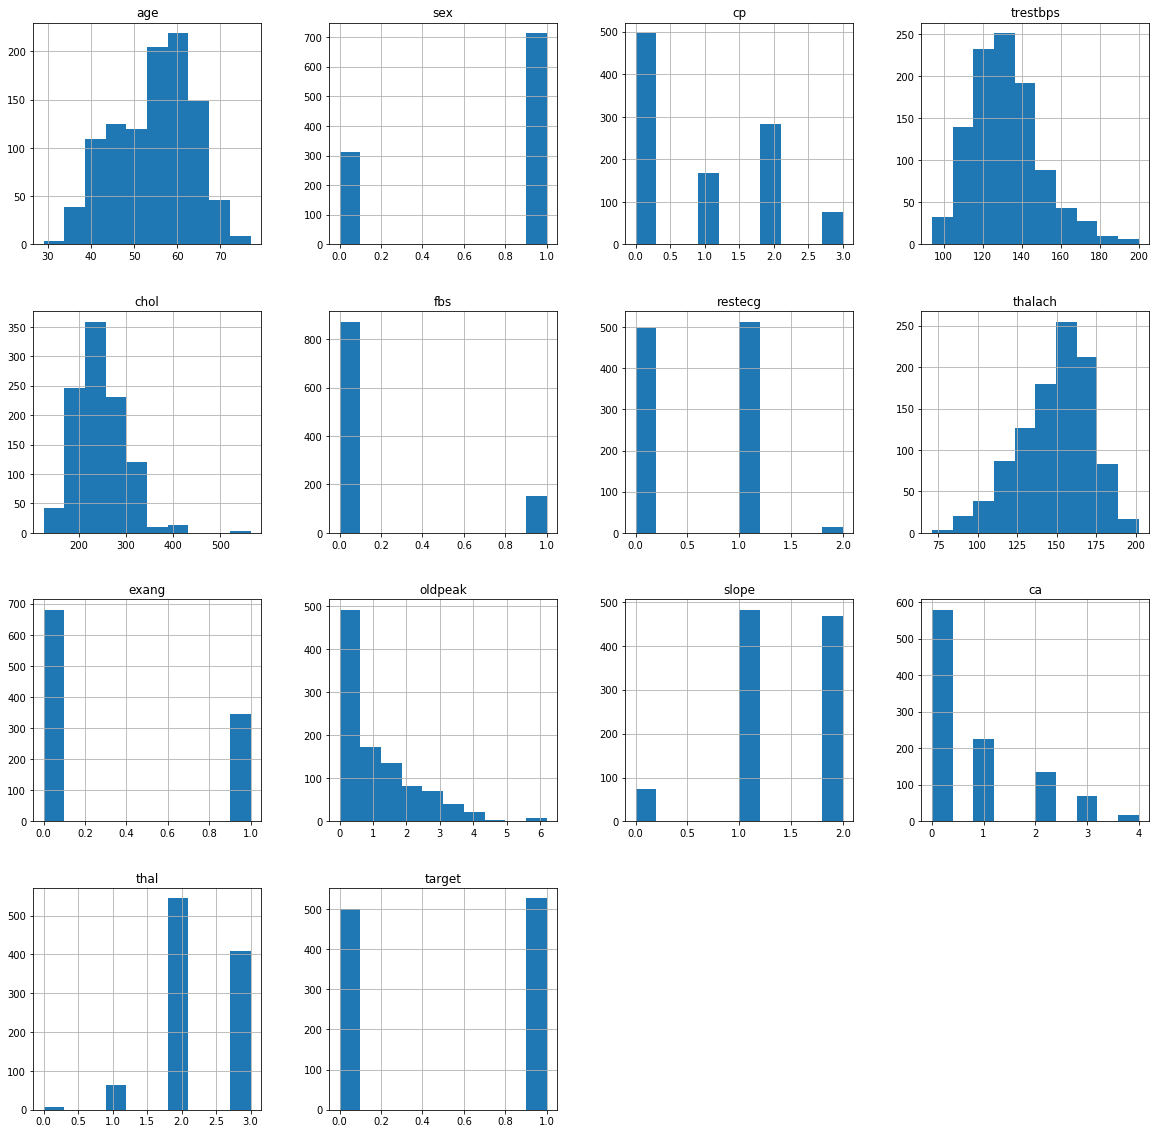

In [33]:
# To plot the histogram of the feature and Target variables
dataset.hist(figsize = (20,20))
plt.show()

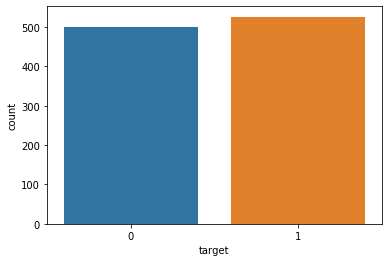

In [34]:
# To visualize the Target column which is the dependant variable
sns.countplot(x="target", data=dataset)
plt.show()

In [35]:
#No. of Patients having Heart disease
No_Disease = len(dataset[dataset.target == 0])
Heart_Disease = len(dataset[dataset.target == 1])
print("Percentage of Patients Doesn't have Heart Disease: {:.2f}%".format((No_Disease / (len(dataset.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((Heart_Disease / (len(dataset.target))*100)))

Percentage of Patients Doesn't have Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


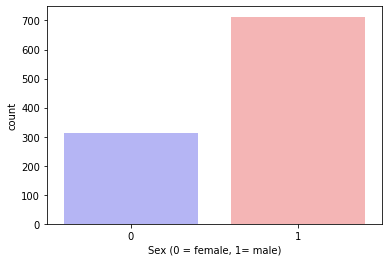

In [36]:
#Another Visualization to show the count of Male and Female patients
sns.countplot(x='sex', data=dataset, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [37]:
#Percentage of male and female patients
F = len(dataset[dataset.sex == 0])
M = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((F / (len(dataset.sex))*100))) # Rounding off to 2 decimals
print("Percentage of Male Patients: {:.2f}%".format((M / (len(dataset.sex))*100)))  # Rounding off to 2 decimals

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [38]:
pip install plotly

You should consider upgrading via the '/Users/rakeshchoudhary/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
# Another visualiation of the patiens having the heart disease or not
import plotly.graph_objs as go

column = "target"
grouped = dataset[column].value_counts().reset_index()
grouped = grouped.rename(columns = {column : "count", "index" : column})

## plot
pieplot = go.Pie(labels=grouped[column], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
Target_Plot = go.Figure(data = [pieplot], layout = layout)
Target_Plot

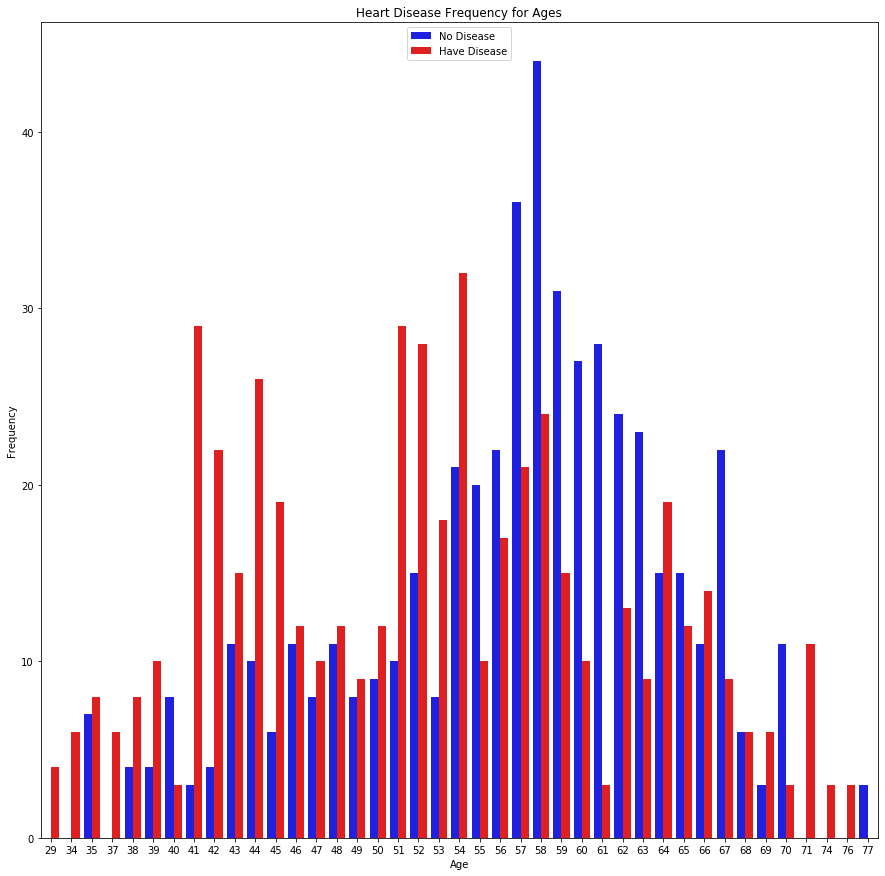

In [40]:
# Heart disease frequency by age
plt.figure(figsize=(15, 15))
sns.countplot(x='age', hue='target', data=dataset, palette=['blue', 'red'])
plt.legend(["No Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

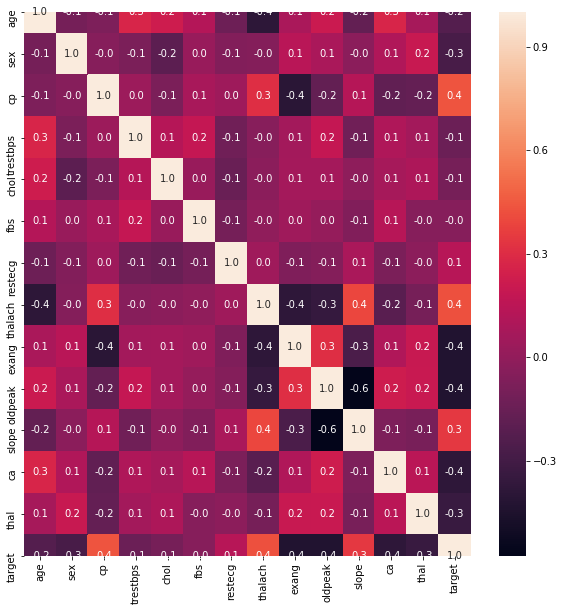

In [41]:
# To Plot the Correlation matrix visualization of the variables in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [42]:
# PERFORMING NORMALIZATION AND CALCULATING ACCURACY
Y = dataset.target.values
X_data = dataset.drop(['target'], 1)

# Min-Max Normalization
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data)).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

#transpose matrices
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

#Model 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train.T,Y_train.T)
accuracy = lr.score(X_test.T,Y_test.T)*100

accuracies['Logistic Regression'] = accuracy
print(" Accuracy of our Regression Model is  {:.2f}%".format(accuracy))

 Accuracy of our Regression Model is  86.34%


/Users/rakeshchoudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [43]:
Y = dataset.target.values
X_dat = dataset.drop(['target'], 1)

# Min-Max Normalization
X = (X_dat - np.min(X_dat)) / (np.max(X_dat) - np.min(X_dat)).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

#transpose matrices
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [44]:
# Machine Learning Algorihm to print the metrics of the scores and accuracies for both Test and training sets 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [45]:
# Splitting of Test and Train sets

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#Decision tree classifier is a tree in which internal nodes are labeled by features
#The classifier categorizes an object by recursively testing for the weights that the features labeling the internal nodes have in vector, until a leaf node is reached

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)

print_score(tree, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[397   0]
 [  0 423]]

Test Result:
Accuracy Score: 98.54%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 97.09%
			F1 score: 98.52%
_______________________________________________
Confusion Matrix: 
 [[102   0]
 [  3 100]]



In [47]:
pip install keras

You should consider upgrading via the '/Users/rakeshchoudhary/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install tensorflow

You should consider upgrading via the '/Users/rakeshchoudhary/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install tensorflow==2.0

You should consider upgrading via the '/Users/rakeshchoudhary/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
from __future__ import print_function
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten

In [51]:
# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (820, 13)
Test Features Size: (205, 13)
Train Labels Size: (820,)
Test Labels Size: (205,)


In [52]:
#Model - 3
# Create a Neural network model
model = Sequential()

In [53]:
model.add(Dense(256, activation='relu', input_dim = 13))
model.add(Dense(256, activation='relu', input_dim = 13))
model.add(Dense(128, activation='relu', input_dim = 13))
model.add(Dense(64, activation='relu', input_dim = 13))
model.add(Dense(32, activation='relu', input_dim = 13))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
NN_model = model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=50)

Train on 820 samples, validate on 205 samples
Epoch 1/50
820/820 [==============================] - 0s 359us/step - loss: 1.4165 - accuracy: 0.5744 - val_loss: 0.6644 - val_accuracy: 0.6244
Epoch 2/50
820/820 [==============================] - 0s 79us/step - loss: 0.6531 - accuracy: 0.6500 - val_loss: 0.6712 - val_accuracy: 0.5951
Epoch 3/50
820/820 [==============================] - 0s 78us/step - loss: 0.5854 - accuracy: 0.6915 - val_loss: 0.6394 - val_accuracy: 0.6537
Epoch 4/50
820/820 [==============================] - 0s 86us/step - loss: 0.6463 - accuracy: 0.6659 - val_loss: 0.6144 - val_accuracy: 0.6585
Epoch 5/50
820/820 [==============================] - 0s 71us/step - loss: 0.6368 - accuracy: 0.6537 - val_loss: 0.6341 - val_accuracy: 0.6683
Epoch 6/50
820/820 [==============================] - 0s 71us/step - loss: 0.6012 - accuracy: 0.7012 - val_loss: 0.7635 - val_accuracy: 0.5756
Epoch 7/50
820/820 [==============================] - 0s 74us/step - loss: 0.6232 - accuracy: 0

In [56]:
## checking the model score 
result = model.evaluate(X_test,Y_test)

205/205 [==============================] - 0s 26us/step


In [57]:
rmse = np.sqrt(result)
print(rmse)

[0.65691935 0.88620871]


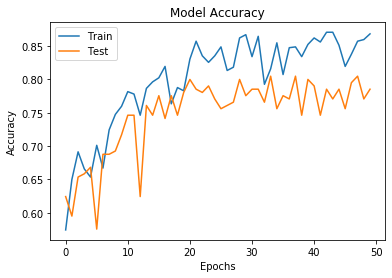

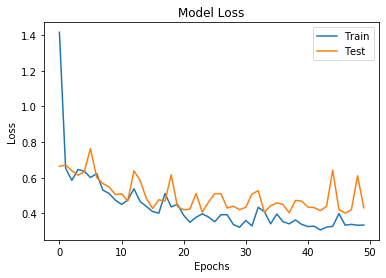

In [58]:
from matplotlib import pyplot as plt


# Plot the model accuracy vs. number of Epochs
plt.plot(NN_model.history['accuracy'])
plt.plot(NN_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(NN_model.history['loss'])
plt.plot(NN_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()